# ガンマトーンフィルタ

In [3]:
import numpy as np
from IPython import display
from scipy import signal
import matplotlib.pyplot as plt

from scipy  
https://github.com/scipy/scipy/blob/v1.10.0/scipy/signal/_filter_design.py#L5386-L5567

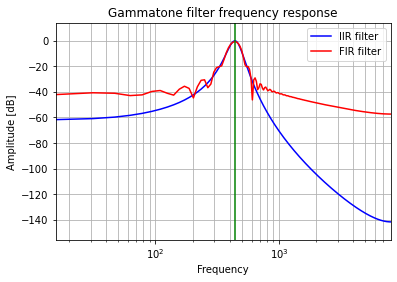

In [26]:
fig, ax = plt.subplots()

b, a = signal.gammatone(440, 'iir', fs=16000)
w, h = signal.freqz(b, a)
ax.plot(w / ((2 * np.pi) / 16000), 20 * np.log10(abs(h)), label='IIR filter', color='blue')

b, a = signal.gammatone(440, 'fir', fs=16000)
w, h = signal.freqz(b, a)
ax.plot(w / ((2 * np.pi) / 16000), 20 * np.log10(abs(h)), label='FIR filter', color='red')

ax.legend()

plt.xscale('log')
plt.title('Gammatone filter frequency response')
plt.xlabel('Frequency')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(440, color='green') # cutoff frequency
plt.show()

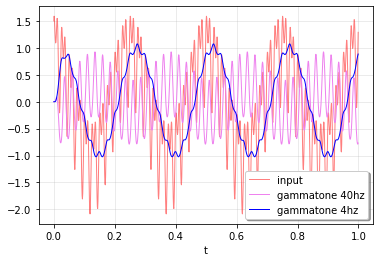

In [179]:
fs = 1000
t = np.linspace(0, 1, fs, endpoint=False)
u = (np.cos(2*np.pi*4*t) + 0.6*np.sin(2*np.pi*40*t) + 0.5*np.cos(2*np.pi*80*t))

plt.plot(t, u, 'r', alpha=0.5, linewidth=1, label='input')

b, a = signal.gammatone(40, 'iir', fs=fs)
tout, yout = signal.dlsim((b, a, 1/fs), u, t=t) 
plt.plot(tout, yout, 'violet', linewidth=1, label='gammatone 40hz')

b, a = signal.gammatone(4, 'iir', fs=fs)
tout, yout = signal.dlsim((b, a, 1/fs), u, t=t) 
plt.plot(tout, yout, 'blue', linewidth=1, label='gammatone 4hz')

plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()